<a href="https://colab.research.google.com/github/agargya123/options_pricing_prediction/blob/main/V2_DSO_530_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from google.colab import files
import io
import statsmodels.api as sm
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

In [ ]:
uploaded = files.upload()

Saving option_train.csv to option_train.csv


In [ ]:
train_data = pd.read_csv(io.BytesIO(uploaded['option_train.csv']))
train_data

,Unnamed: 0,Value,S,K,tau,r,BS
0,1,348.500,1394.46,1050,0.128767,0.0116,Under
1,2,149.375,1432.25,1400,0.679452,0.0113,Under
2,3,294.500,1478.90,1225,0.443836,0.0112,Under
3,4,3.375,1369.89,1500,0.117808,0.0119,Over
4,5,84.000,1366.42,1350,0.298630,0.0119,Under
...,...,...,...,...,...,...,...
4995,4996,325.250,1465.15,1175,0.424658,0.0111,Under
4996,4997,36.000,1480.87,1480,0.101370,0.0111,Over
4997,4998,90.000,1356.56,1500,0.673973,0.0120,Under
4998,4999,175.875,1333.36,1200,0.309589,0.0122,Under


In [ ]:
a = train_data.isna().sum()
print(a)
# train_data = train_data.dropna()

X = train_data[['S', 'K', 'r', 'tau']]  # Features
y = train_data['Value']  # Target variable

Unnamed: 0    0
Value         0
S             0
K             0
tau           0
r             0
BS            0
dtype: int64


In [ ]:
# Add constant term for intercept
X = sm.add_constant(X)

# Fit OLS model
model = sm.OLS(y, X).fit()

In [ ]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                 1.540e+04
Date:                Tue, 09 Apr 2024   Prob (F-statistic):               0.00
Time:                        03:36:09   Log-Likelihood:                -24767.
No. Observations:                5000   AIC:                         4.954e+04
Df Residuals:                    4995   BIC:                         4.958e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        185.5711    137.834      1.346      0.1

<ipython-input-19-520a7b440dc7>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='S', data=train_data, palette='viridis')


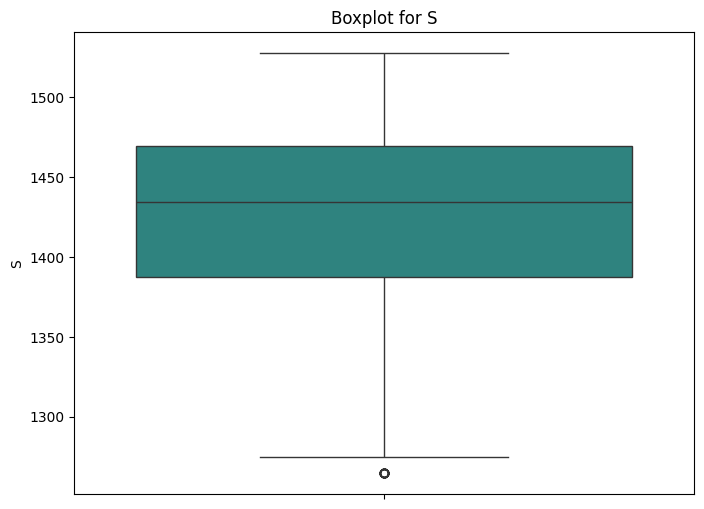

<ipython-input-19-520a7b440dc7>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='K', data=train_data, palette='viridis')


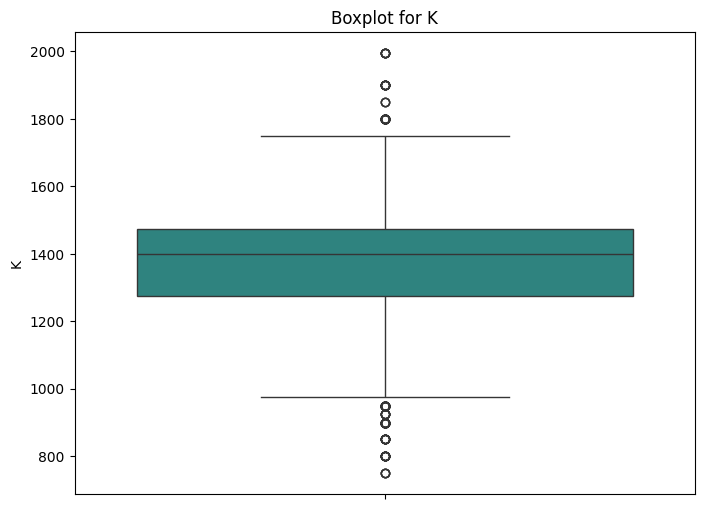

<ipython-input-19-520a7b440dc7>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='r', data=train_data, palette='viridis')


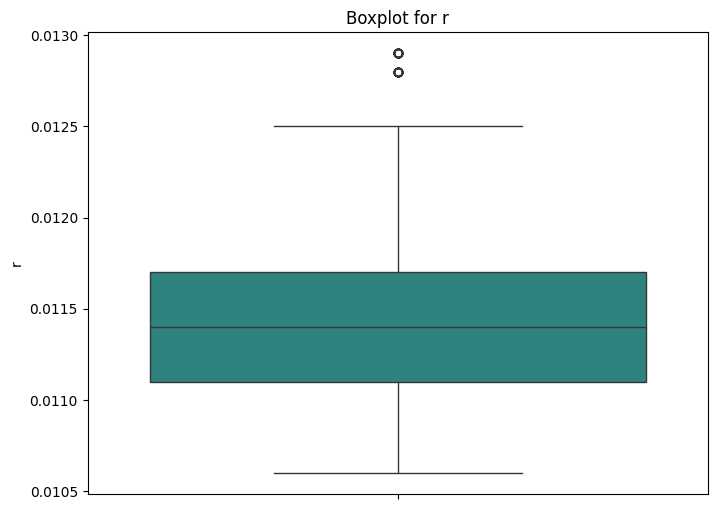

<ipython-input-19-520a7b440dc7>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='tau', data=train_data, palette='viridis')


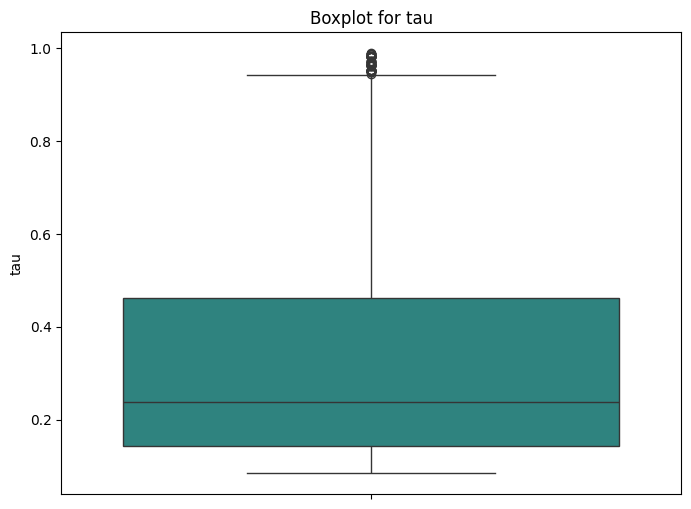

<ipython-input-19-520a7b440dc7>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='Value', data=train_data, palette='viridis')


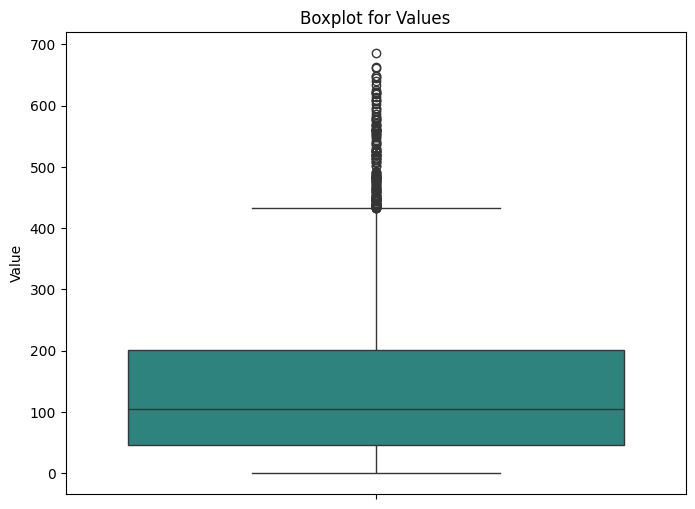

In [ ]:
#Boxplot for Peak Rank

import matplotlib.pyplot as plt
import seaborn as sns

# Create a boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(y='S', data=train_data, palette='viridis')
plt.title('Boxplot for S' )

plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(y='K', data=train_data, palette='viridis')
plt.title('Boxplot for K' )

plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(y='r', data=train_data, palette='viridis')
plt.title('Boxplot for r' )

plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(y='tau', data=train_data, palette='viridis')
plt.title('Boxplot for tau' )

plt.show()


plt.figure(figsize=(8, 6))
sns.boxplot(y='Value', data=train_data, palette='viridis')
plt.title('Boxplot for Values' )
plt.show()

In [ ]:
z_scores = np.abs(stats.zscore(train_data[['Value']]))
outlier_indices = np.where(z_scores > 2.5)[0] # z-score of 98% CI is 2.33
len(outlier_indices)

130

In [ ]:
z_scores = np.abs(stats.zscore(train_data[['K']]))
outlier_indices = np.where(z_scores > 2.33)[0] # z-score of 98% CI is 2.33
len(outlier_indices)

169

In [ ]:
z_scores = np.abs(stats.zscore(train_data[['K']]))
outlier_indices = np.where(z_scores > 2.5)[0] # z-score of 98% CI is 2.33
len(outlier_indices)
# Remove outliers
#cleaned_data = train_data.drop(outlier_indices)
#cleaned_data

93

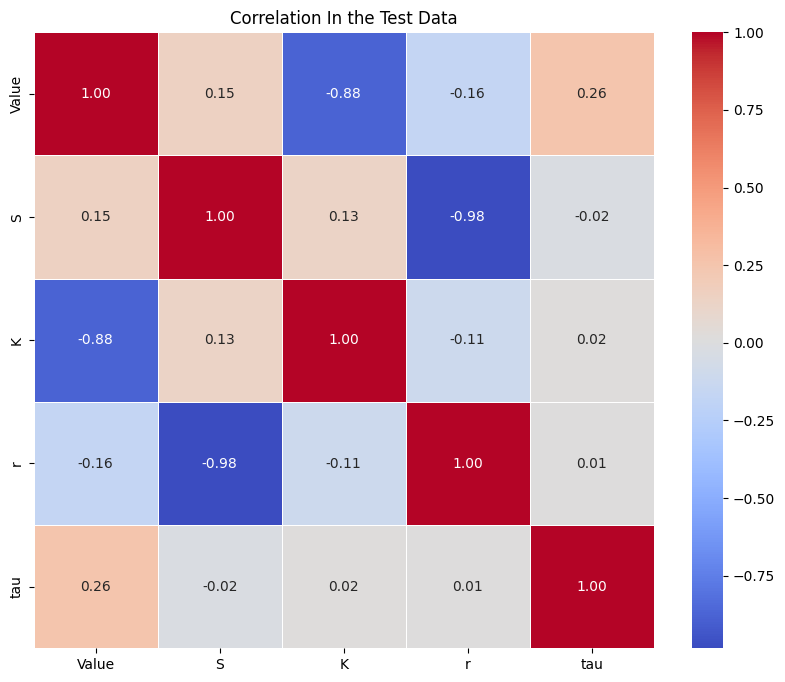

In [ ]:
#X = train_data[['S', 'K', 'r', 'tau']]  # Features
correlation_matrix = train_data[['Value','S', 'K', 'r', 'tau']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation In the Test Data')
plt.show()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

z_scores = np.abs(stats.zscore(train_data[['Value', 'S', 'K', 'r', 'tau']]))
outlier_indices = np.where(z_scores > 2.33)[0] # z-score of 98% CI is 2.33

# Remove outliers
cleaned_data = train_data.drop(outlier_indices)

# Check the shape of the cleaned dataset
print("Shape of cleaned dataset:", cleaned_data.shape)

# Split the dataset into features (X) and target variable (y)
X = cleaned_data[['S', 'K', 'r', 'tau']]
y = cleaned_data['Value']

# Add constant term for intercept
X = sm.add_constant(X)

# Fit OLS model
model = sm.OLS(y, X).fit()

vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

summary_with_vif = pd.merge(model.summary().tables[1], vif_data, left_index=True, right_on="Variable", how="left")

# Print summary
#print(model.summary())
print(summary_with_vif)

Shape of cleaned dataset: (4545, 7)


TypeError: Can only merge Series or DataFrame objects, a <class 'statsmodels.iolib.table.SimpleTable'> was passed

In [ ]:
############## chatgpt
from statsmodels.stats.outliers_influence import variance_inflation_factor

z_scores = np.abs(stats.zscore(train_data[['Value', 'S', 'K', 'r', 'tau']]))
outlier_indices = np.where(z_scores > 2.33)[0] # z-score of 98% CI is 2.33

# Remove outliers
cleaned_data = train_data.drop(outlier_indices)

# Check the shape of the cleaned dataset
print("Shape of cleaned dataset:", cleaned_data.shape)

# Split the dataset into features (X) and target variable (y)
X = cleaned_data[['S', 'K', 'r', 'tau']]
y = cleaned_data['Value']

# Add constant term for intercept
X = sm.add_constant(X)

# Fit OLS model
model = sm.OLS(y, X).fit()

# Calculate VIF for each independent variable
vif_data = pd.DataFrame()
vif_data["K"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Convert model summary table to DataFrame
summary_table = pd.DataFrame(model.summary().tables[1])
summary_table.columns = model.summary().tables[1].data[0]

# Merge summary table with VIF data
summary_with_vif = pd.merge(summary_table, vif_data, on="K")

# Print summary with VIF
print(summary_with_vif)


Shape of cleaned dataset: (4545, 7)


KeyError: 'K'

In [ ]:
# Perform k-fold cross-validation
linear_regression = LinearRegression()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Standardize features
cv_scores = cross_val_score(linear_regression, X_scaled, y, cv=5, scoring='r2')

# Print cross-validation scores
print("Cross-validated R^2 scores:", cv_scores)
print("Mean R^2 score:", np.mean(cv_scores))

Cross-validated R^2 scores: [0.93813825 0.93904628 0.94591304 0.93000797 0.93463753]
Mean R^2 score: 0.9375486165070969


In [ ]:
# Perform Ridge Regression with regularization parameter lambda = 1
ridge_model = Ridge(alpha=13)
ridge_model.fit(X, y)

# Coefficients
coefficients = ridge_model.coef_
intercept = ridge_model.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)

# Calculate in-sample R^2 score
in_sample_predictions = ridge_model.predict(X)
in_sample_r2 = r2_score(y, in_sample_predictions)

print("In-sample R^2 score:", in_sample_r2)

Coefficients: [ 0.00000000e+00  6.19182609e-01 -6.64190365e-01 -2.72526638e-02
  1.38388930e+02]
Intercept: 117.25255165332061
In-sample R^2 score: 0.9375878831495466


In [ ]:
uploaded1 = files.upload()

Saving option_test_nolabel.csv to option_test_nolabel.csv


In [ ]:
test_data = pd.read_csv(io.BytesIO(uploaded1['option_test_nolabel.csv']))
test_data.head()

,Unnamed: 0,S,K,tau,r
0,1,1409.28,1325,0.126027,0.0115
1,2,1505.97,1100,0.315068,0.0110
2,3,1409.57,1450,0.197260,0.0116
3,4,1407.81,1250,0.101370,0.0116
4,5,1494.50,1300,0.194521,0.0110


In [ ]:
test_data.shape

(500, 5)

In [ ]:
# Extract features for test data
X_test_data = test_data[['S', 'K', 'r', 'tau']]

# Add constant term for intercept
X_test_data = sm.add_constant(X_test_data)

# Predictions on the test data
test_predictions = model.predict(X_test_data)

# Print predictions
print(test_predictions)

0      126.872514
1      361.203434
2       53.274176
3      171.074132
4      204.456744
          ...    
495    298.210460
496     -0.768064
497     65.922161
498     92.536426
499    200.028284
Length: 500, dtype: float64


In [ ]:
uploaded2 = files.upload()

Saving group_0_prediction.csv to group_0_prediction.csv


In [ ]:
sample_prediction_data = pd.read_csv(io.BytesIO(uploaded2['group_0_prediction.csv']))
sample_prediction_data.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,Value,BS,NaN,NaN,NaN,NaN,NaN
1,1,0,NaN,NaN,NaN,NaN,NaN
2,2,0,NaN,NaN,NaN,NaN,NaN
3,1,0,NaN,NaN,NaN,NaN,NaN
4,1,0,NaN,NaN,NaN,NaN,NaN
